<a href="https://colab.research.google.com/github/Eduardo-Coyto/CICADA/blob/Gesti%C3%B3n-de-Datos/MixIntroPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Repaso/Comentarios



*   Pudieron ejecutar el notebook?
* Dudas LAB anterior al final del notebook previo
*   De dónde vienen los datos? (archivos de intercambio, BDs, APIs)




# Módulo 2: Pandas, análisis de datos con Python

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)]()


En este notebook describiremos las características principales, y formas de trabajo con Pandas, la principal biblioteca de análisis de datos del ecosistema Python. Pandas está apoyado en NumPy, la biblioteca de análisis numérico básica de Python (este módulo asume que el lector conoce NumPy).

Referencias:

- El notebook está basado en el [material adicional](https://github.com/pln-fing-udelar/curso_aa/blob/master/material_adicional/Intro_Pandas.ipynb) del curso de Aprendizaje Automático del grupo PLN - Fing - Udelar,
- Las imágenes son del libro [Effective Pandas](https://store.metasnake.com/effective-pandas-book)
- [Data Science Toolbox (Capítulo 2 del Libro recomendado)](https://github.com/DataScienceUB/introduction-datascience-python-book/blob/master/ch02_Toolbox.ipynb)
- [Toolbox en español](https://colab.research.google.com/drive/1nuevJ6FAUHXeB9qy2NxGKk8qj5mEschi?usp=sharing#scrollTo=KjopRuvw2-xS) 


In [ ]:
import numpy as np
import pandas as pd

# Este notebook fue elaborado con la versión 1.0.3 de Pandas
pd.__version__

'1.3.5'

## 1. Series

Una de las estructuras básicas de Pandas es la serie: un array unidimensional _etiquetado_ que puede contener cualquier tipo de datos de Python. Atención: en Pandas los datos y sus etiquetas van siempre juntos, a menos que esa relación se quiebre a propósito. Las etiquetas son llamadas en general _index_. Las Series pueden crearse a partir de ndarrays, diccionarios de Python o valores escalares.

Las series se comportan de forma muy similar a un ndarray, y son argumentos válidos de la mayoría de las funciones de NumPy. 

Creemos una serie de 5 números aleatorios, cada uno con su etiqueta asociada (el largo del índice debe ser el mismo que el del array). Si no se le indica índice, le va a poner [0, ..., len(data)-1]

In [ ]:
s= pd.Series(np.random.randn(5), index=['a','b','c','d','e'])
s


a   -0.907197
b    0.070072
c   -0.898316
d   -0.231649
e   -0.141846
dtype: float64

También podemos crear una Series a partir de un diccionario de Python. Como no le especificamos índices, se genera a partir de las primeras componentes, ordenadas en el mismo orden de inserción en el diccionario:

In [ ]:
d = pd.Series({'b': 1, 'a': 0, 'c': 2})
d

b    1
a    0
c    2
dtype: int64

Podemos especificar un índice para indicar el orden (y para meter elementos inexistentes). La forma estándar en Pandas de especificar la ausencia de datos es vía NaN.


Las series se comportan de forma muy similar a un array y, de hecho, la mayoría de las operaciones con ndarrays admiten series como argumentos (y manejan apropiadamente las etiquetas, para que sigan asociadas luego de realizada la operación):

In [ ]:
s[s > s.median()] # Seleccionamos los valores mayores a la mediana del array. 

b    0.070072
e   -0.141846
dtype: float64

Alternativamente, podemos ver a las series como un diccionario (de largo fijo) que puede accederse y cambiar valores a través de su índice:

In [ ]:
s['a']

-0.9071968002237646

In [ ]:
s['e']=12

s

a    -0.907197
b     0.070072
c    -0.898316
d    -0.231649
e    12.000000
dtype: float64

In [ ]:
'e' in s

True

In [ ]:
s.get(['f'],np.nan) # Si no ponemos el get, devuelve error

nan

Al igual que en NumPy, las series admite operaciones vectorizadas. También es interesante ver que las operaciones sobre Series alinean en base a las etiquetas automáticamente (utilizando la unión de las etiquetas de las series involucradas). Cuando una etiqueta está en una serie pero no en la otra, el resultado se marca como NaN.

In [ ]:
s[1:] # sin el primer elemento

b     0.070072
c    -0.898316
d    -0.231649
e    12.000000
dtype: float64

In [ ]:
s[:-1] # sin el último elemento

a   -0.907197
b    0.070072
c   -0.898316
d   -0.231649
dtype: float64

In [ ]:
s[1:]+s[:-1]

a         NaN
b    0.140144
c   -1.796632
d   -0.463297
e         NaN
dtype: float64

Las Series tienen un nombre, que está en el atributo name, y que puede especificarse al crearlo, o cambiarse con rename()

In [ ]:
s2=s.rename('My_index')
s2

a    -0.907197
b     0.070072
c    -0.898316
d    -0.231649
e    12.000000
Name: My_index, dtype: float64

La función `value_counts` es muy interesante, porque, dada una `Series`,  nos devuelve una `Series` con la cantidad de valores diferentes (en nuestro ejemplo es trivial, porque todos los valores son diferentes). 

In [ ]:
s.value_counts()

-0.907197     1
 0.070072     1
-0.898316     1
-0.231649     1
 12.000000    1
dtype: int64

## 2. DataFrames

Los DataFrames son la estructura más comúnmente utilizada en pandas. Pueden verse como un conjunto de columnas de diferentes tipos (como una planilla Excel), o como una matriz 2D con etiquetas asociadas. Al crearlas, se pueden especificar los "index" (etiquetas de las filas), y/o los "columns" (las etiquetas de las columnas).

Existen muchas formas de crear DataFrames: como un diccionario de Series o ndarrays, ndarrays de 2 dimensiones, una Serie o incluso otro DataFrame. 

Creemos un DataFrame a partir de un 2D-ndarray: 


In [ ]:
a = np.array([
    [65,60,60,45,60],
    [75,35,50,75,40],
    [85,80,30,20,75],
    [75,45,30,70,80],
    [80,55,90,40,45],
    [90,60,95,15,45],
    [60,55,45,55,40]
])
df=pd.DataFrame(a)
df

,0,1,2,3,4
0,65,60,60,45,60
1,75,35,50,75,40
2,85,80,30,20,75
3,75,45,30,70,80
4,80,55,90,40,45
5,90,60,95,15,45
6,60,55,45,55,40


Obsérvese que los nombres de los index y los columns son creados automáticamente, pero probablemente querramos especificarlos en la creación. En el ejemplo anterior, nos gustaría ponerle nombres a las columnas (en este caso, cada fila tiene las características de un arma en el juego Call of Duty):

In [ ]:
df=pd.DataFrame(a,columns=['Daño','Precisión','Alcance','Cadencia','Movilidad'])
df

,Daño,Precisión,Alcance,Cadencia,Movilidad
0,65,60,60,45,60
1,75,35,50,75,40
2,85,80,30,20,75
3,75,45,30,70,80
4,80,55,90,40,45
5,90,60,95,15,45
6,60,55,45,55,40


Podemos consultar los índices y las columnas:

In [ ]:
df.index, df.columns


(RangeIndex(start=0, stop=7, step=1),
 Index(['Daño', 'Precisión', 'Alcance', 'Cadencia', 'Movilidad'], dtype='object'))

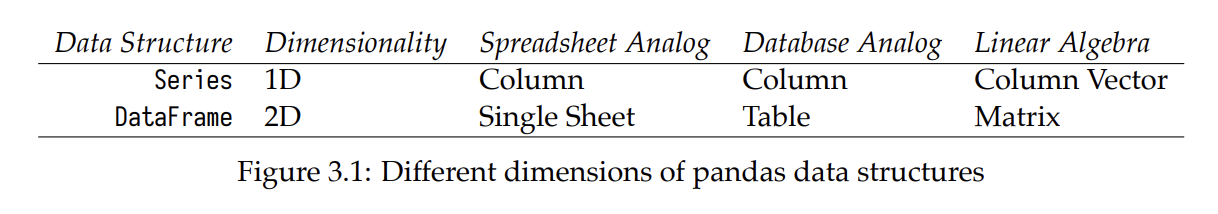

Veamos otra forma de crear DataFrames: a través de una lista de Series. Obsérvese qué pasa cuando se especifica un índice que no está en el diccionario. 

In [ ]:
d = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])} 
# Obsérvese que en la columna 'one' no tenemos nada en la fila 'd'
df2 = pd.DataFrame(d)
df2

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [ ]:
pd.DataFrame(d, columns=['two','three'])

,two,three
a,1.0,NaN
b,2.0,NaN
c,3.0,NaN
d,4.0,NaN


Los arrays son objetos, y tienen métodos asociados. Utilice el método `dtype` para conocer el tipo de los elementos de `a`

Otra forma útil de crear DataFrames es a partir de una lista de diccionarios de python:

In [ ]:
datos = [
        {
            "nombre": "Alberto Méndez",
            "edad": 54
        },
        {
            "nombre": "Andrea Martínez",
            "edad": 45
        }
      ]

pd.DataFrame(datos) 

,nombre,edad
0,Alberto Méndez,54
1,Andrea Martínez,45


En la [documentación](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html#dsintro) pueden verse muchas formas de crear DataFrames. Si creamos un DataFrame a partir de una Series, obtendremos una sola columna, cuyo nombre es el nombre de la Series. 

Una forma de tener una idea general sobre nuestro DataFrame es utilizando el método `describe`

In [ ]:
df.describe()

,Daño,Precisión,Alcance,Cadencia,Movilidad
count,7.000000,7.000000,7.000000,7.000000,7.000000
mean,75.714286,55.714286,57.142857,45.714286,55.000000
std,10.578505,13.972763,26.435006,22.990681,16.832508
min,60.000000,35.000000,30.000000,15.000000,40.000000
25%,70.000000,50.000000,37.500000,30.000000,42.500000
50%,75.000000,55.000000,50.000000,45.000000,45.000000
75%,82.500000,60.000000,75.000000,62.500000,67.500000
max,90.000000,80.000000,95.000000,75.000000,80.000000


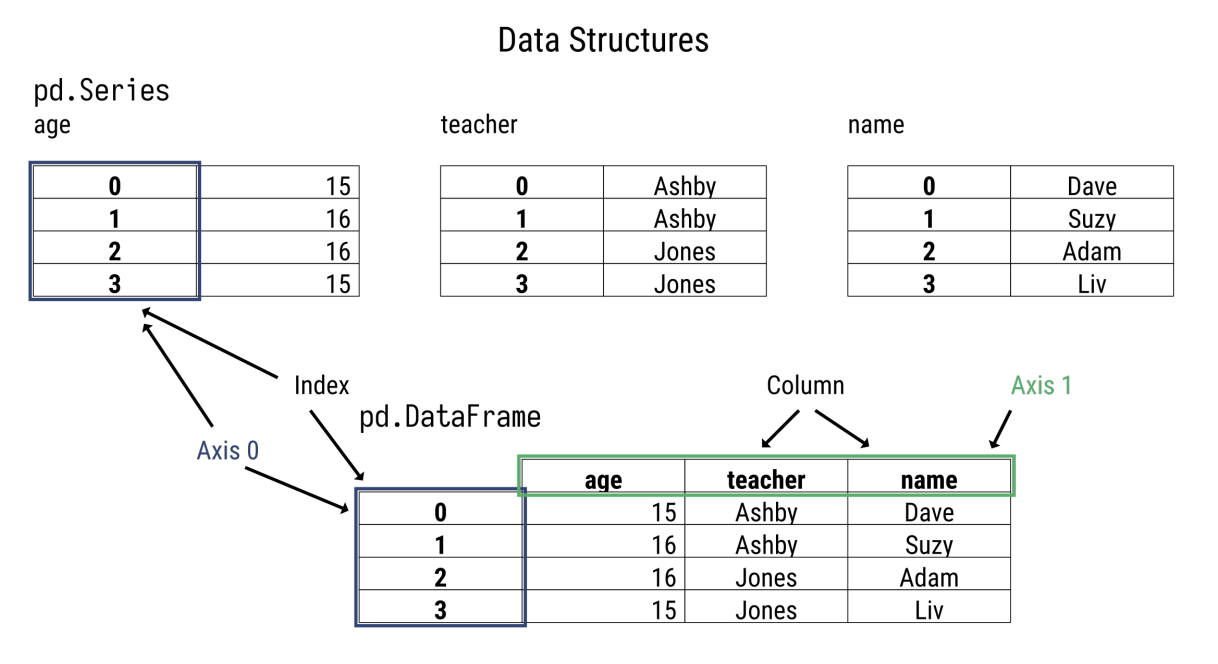

## 3. Carga de Datos

Además de crear DataFrames a partir de arrays o diccionarios es posible y frecuente importarlos desde archivos en formato Excel o Csv. En este caso se usarán datos abiertos disponibles en el [Portal de Datos Abiertos del Estado](https://catalogodatos.gub.uy/).

Primero descargaremos dos archivos al entorno del Colab:
* Viajes por día, tipo de servicio y trayecto - 2022
* Listado de trayectos al que corresponden los viajes

In [ ]:
!wget -qO viajes_recoleccion_residuos.csv https://catalogodatos.gub.uy/dataset/670f7cca-c9d8-486e-b7d5-2677825d16f3/resource/084aa2b8-956e-4071-9504-fe9e4a1d2f4c/download/viajes_por_dia_tipo_servicio_trayecto.csv
!wget -qO trayectos.csv https://catalogodatos.gub.uy/dataset/670f7cca-c9d8-486e-b7d5-2677825d16f3/resource/18def549-4121-48cb-97ab-3e0d468a891e/download/trayectos.csv

Luego usamos la función read_csv de pandas para cargar los archivos como DataFrame, y la función head para ver las 5 primeras filas.

In [ ]:
df_viajes = pd.read_csv("viajes_recoleccion_residuos.csv")
df_viajes.head()

,DIA,TIPO_SERVICIO,TRAYECTO,PESO_NETO,CANT_VIAJES
0,01/01/2022,24,1904,14230,1
1,01/01/2022,24,1906,16020,1
2,01/01/2022,24,1910,14010,1
3,01/01/2022,24,1912,0,1
4,01/01/2022,24,2786,26640,1


In [ ]:
df_trayectos = pd.read_csv("trayectos.csv")
df_trayectos.head()

,TRAYECTO,DESCRIPCION,NOMENCLATURA_CIRCUITO
0,3,LEVANTE BOLSAS DE BARRIDO,LB_5_TAREAMANO
1,6,DOMICILIARIA MANUAL,G_DM_01
2,7,DOMICILIARIA MANUAL,G_DM_03
3,8,DOMICILIARIA MANUAL,G_DM_04
4,9,DOMICILIARIA MANUAL,G_DM_05


Podemos también tener un resumen estadístico rápido del DataFrame usando la función *describe*. Esta función nos devuelve cuantos valores hay en cada columna, la media de los valores, el desvío estándar, entre otros.

In [ ]:
df_viajes.describe()

,TIPO_SERVICIO,TRAYECTO,PESO_NETO,CANT_VIAJES
count,11243.000000,11243.000000,11243.000000,11243.000000
mean,28.398114,2511.177088,9714.823446,1.107534
std,16.066720,381.157933,9273.916347,0.374298
min,1.000000,162.000000,0.000000,1.000000
25%,24.000000,2345.000000,1090.000000,1.000000
50%,24.000000,2680.000000,8810.000000,1.000000
75%,27.000000,2735.000000,15905.000000,1.000000
max,78.000000,2815.000000,94290.000000,9.000000


O la función *info* que nos da información sobre las columnas:

In [ ]:
df_viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11243 entries, 0 to 11242
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DIA            11243 non-null  object
 1   TIPO_SERVICIO  11243 non-null  int64 
 2   TRAYECTO       11243 non-null  int64 
 3   PESO_NETO      11243 non-null  int64 
 4   CANT_VIAJES    11243 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 439.3+ KB


In [ ]:
df_trayectos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2784 entries, 0 to 2783
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TRAYECTO               2784 non-null   int64 
 1   DESCRIPCION            2784 non-null   object
 2   NOMENCLATURA_CIRCUITO  1379 non-null   object
dtypes: int64(1), object(2)
memory usage: 65.4+ KB


## 4.Selección de Datos

Es muy común que queramos seleccionar un subconjunto de nuestros datos. Para hacer la selección, ponemos paréntesis cuadrados [] después de nuestro DataFrame, e indicamos en los paréntesis qué datos queremos seleccionar.

Como vimos, seleccionar una columna de un DataSeries es muy parecido a seleccionar un elemento de un diccionario, siendo la clave el nombre de la columna. El resultado es una Serie.

También es posible seleccionar por más de una columna a la vez: en ese caso, en vez de pasarle el nombre de la columna, le pasamos una lista con los nombres de las columnas seleccionadas, esto es util para quedarnos solo con las columnas de interés después de realizar operaciones. El resultado es otro DataFrame.

In [ ]:
pesos = df_viajes["PESO_NETO"]
pesos

0        14230
1        16020
2        14010
3            0
4        26640
         ...  
11238        0
11239     2270
11240        0
11241        0
11242     2750
Name: PESO_NETO, Length: 11243, dtype: int64

In [ ]:
df_viajes[['DIA', 'CANT_VIAJES']]


,DIA,CANT_VIAJES
0,01/01/2022,1
1,01/01/2022,1
2,01/01/2022,1
3,01/01/2022,1
4,01/01/2022,1
...,...,...
11238,31/05/2022,1
11239,31/05/2022,1
11240,31/05/2022,1
11241,31/05/2022,1


El loc indexing nos permite hacer más selecciones de los datos del DataFrame. Para esto, escribimos .loc luego del DataFrame, e indicamos entre paréntesis cuadrados qué valores del DataFrame queremos (ponemos las filas y las columnas separadas por una coma, en ese orden).

Por ejemplo, si queremos elegir las filas en las posiciones 90 a 93, y todas las columnas, escribimos lo siguiente:

In [ ]:
subconjunto1 = df_viajes.loc[90:94,:]
subconjunto1

,DIA,TIPO_SERVICIO,TRAYECTO,PESO_NETO,CANT_VIAJES
90,03/01/2022,24,2716,22930,1
91,03/01/2022,24,2718,23340,1
92,03/01/2022,24,2720,0,4
93,03/01/2022,24,2722,0,1
94,03/01/2022,24,2723,0,2


Notamos que el carácter ":" sólo significa "seleccionar todos", se mantienen todas las columnas.

Si queremos elegir las filas de índices 10, 20, 30 y 40, pasamos estos índices en una lista:

In [ ]:
subconjunto2 = df_viajes.loc[[10,20,30,40],:]
subconjunto2

,DIA,TIPO_SERVICIO,TRAYECTO,PESO_NETO,CANT_VIAJES
10,01/01/2022,24,2800,17990,1
20,02/01/2022,24,2656,0,1
30,02/01/2022,24,2686,0,1
40,02/01/2022,24,2717,9830,1


## 5. Filtrado de datos

Normalmente, las selecciones de datos que queremos hacer obecen algún criterio que nos interesa. Por ejemplo, analizar los datos de cierto período de tiempo, de cierta subpoblación, etc.

En estos casos, podemos hacer la selección de datos implementando el criterio de interés con operaciones lógicas.

Por ejemplo, supongamos que queremos las filas del DataFrame que tienen un PESO_NETO mayor a 9000. Usando el operador lógico ">" podemos obtener un vector que indica, para cada entrada de la columna *Value*, si la misma es mayor que 9000:

In [ ]:
condicion_peso_mayor = df_viajes['PESO_NETO'] > 9000
condicion_peso_mayor

0         True
1         True
2         True
3        False
4         True
         ...  
11238    False
11239    False
11240    False
11241    False
11242    False
Name: PESO_NETO, Length: 11243, dtype: bool

Podemos usar este vector lógico para seleccionar las filas que cumplen con esta condición. Notar que el DataFrame resultante tiene menos filas: las que cumplieron con la condición.

In [ ]:
df_viajes[condicion_peso_mayor]

,DIA,TIPO_SERVICIO,TRAYECTO,PESO_NETO,CANT_VIAJES
0,01/01/2022,24,1904,14230,1
1,01/01/2022,24,1906,16020,1
2,01/01/2022,24,1910,14010,1
4,01/01/2022,24,2786,26640,1
5,01/01/2022,24,2787,20840,1
...,...,...,...,...,...
11221,31/05/2022,24,2801,11270,1
11222,31/05/2022,24,2806,16120,1
11223,31/05/2022,24,2809,32080,1
11224,31/05/2022,24,2810,26260,1


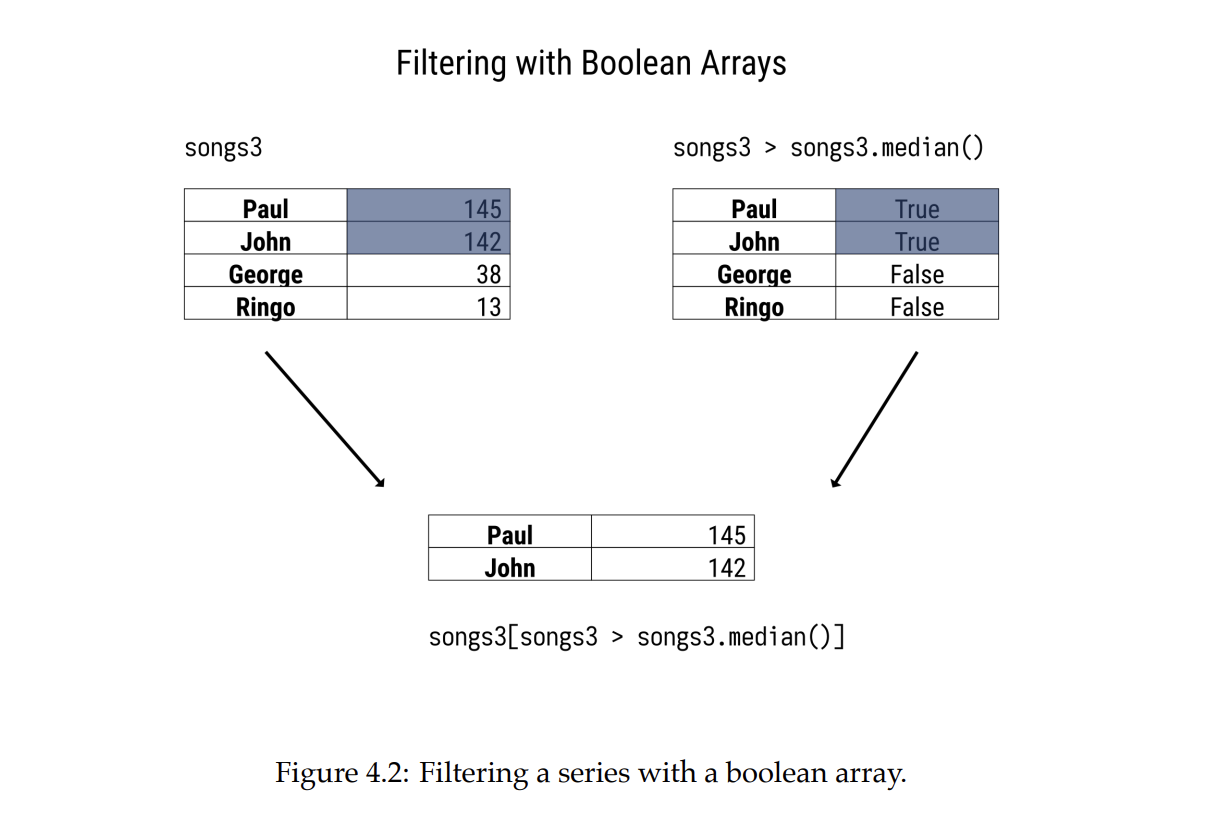

**Aclaración**: Las operaciónes con DataFrame devuelven en general el DataFrame modificado como resultado de la función pero no modifican el DataFrame original. Si se quiere retener el resultado de la operación, se debe guardar en una nueva variable:

In [ ]:
df_viajes_pesados = df_viajes[condicion_peso_mayor]
df_viajes_pesados

,DIA,TIPO_SERVICIO,TRAYECTO,PESO_NETO,CANT_VIAJES
0,01/01/2022,24,1904,14230,1
1,01/01/2022,24,1906,16020,1
2,01/01/2022,24,1910,14010,1
4,01/01/2022,24,2786,26640,1
5,01/01/2022,24,2787,20840,1
...,...,...,...,...,...
11221,31/05/2022,24,2801,11270,1
11222,31/05/2022,24,2806,16120,1
11223,31/05/2022,24,2809,32080,1
11224,31/05/2022,24,2810,26260,1


Respecto a los valores nulos o datos faltantes:

* *None*: *None* es un objeto de Python para denotar un valor nulo, cualquier variable puede valer *None*

* *NaN* : *NaN* (acronimo para Not a Number), es un numero de punto flotante especial reconocido por los sistemas que usan la representación IEEE de punto flotante.

Pandas trata a *None* y *NaN* esencialmente como intercambiables para indicar la falta de datos. Para facilitar esta convención hay varias funciones para detectar, quitar o reemplazar valores faltantes en un DataFrame de Pandas:



Podemos usar la función *.isnull()*, que indica si un valor es NaN, devolviendo un vector Booleano.

Para eliminar los valores NaN, usamos el operador "~" que significa "no", y junto con *.isnull()* nos devuelve un vector indicando los valores que **no** son null.

Volvamos a ver la información de las columnas de los trayectos:

In [ ]:
df_trayectos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2784 entries, 0 to 2783
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   TRAYECTO               2784 non-null   int64 
 1   DESCRIPCION            2784 non-null   object
 2   NOMENCLATURA_CIRCUITO  1379 non-null   object
dtypes: int64(1), object(2)
memory usage: 65.4+ KB


La columna "NOMENCLATURA_CIRCUITO" tiene solo 1379 filas con valores (no nulos)

In [ ]:
condicion_nomenclaturas_validas = ~df_trayectos['NOMENCLATURA_CIRCUITO'].isnull()
condicion_nomenclaturas_validas

0       True
1       True
2       True
3       True
4       True
        ... 
2779    True
2780    True
2781    True
2782    True
2783    True
Name: NOMENCLATURA_CIRCUITO, Length: 2784, dtype: bool

Podemos seleccionar esas filas usando la condición:

In [ ]:
df_trayectos[condicion_nomenclaturas_validas]

,TRAYECTO,DESCRIPCION,NOMENCLATURA_CIRCUITO
0,3,LEVANTE BOLSAS DE BARRIDO,LB_5_TAREAMANO
1,6,DOMICILIARIA MANUAL,G_DM_01
2,7,DOMICILIARIA MANUAL,G_DM_03
3,8,DOMICILIARIA MANUAL,G_DM_04
4,9,DOMICILIARIA MANUAL,G_DM_05
...,...,...,...
2779,2812,RECOLECCIÓN DOMICILIARIA POR CONTENEDORES METÁ...,F_DU_RM_CL_112
2780,2813,RECOLECCIÓN DOMICILIARIA POR CONTENEDORES METÁ...,F_DU_RM_CL_113
2781,2814,RECOLECCIÓN DOMICILIARIA POR CONTENEDORES METÁ...,F_DU_RM_CL_114
2782,2815,RECOLECCIÓN DOMICILIARIA POR CONTENEDORES METÁ...,F_DU_RM_CL_115


Otra forma conveniente de eliminar filas con valores NaN es usar la función **DataFrame.dropna()**. Esta función elimina las filas que tienen un valor NaN en cualquiera de sus columnas. O de **alguna** de sus columnas usando el argumento subset.

In [ ]:
df_trayectos.dropna()

,TRAYECTO,DESCRIPCION,NOMENCLATURA_CIRCUITO
0,3,LEVANTE BOLSAS DE BARRIDO,LB_5_TAREAMANO
1,6,DOMICILIARIA MANUAL,G_DM_01
2,7,DOMICILIARIA MANUAL,G_DM_03
3,8,DOMICILIARIA MANUAL,G_DM_04
4,9,DOMICILIARIA MANUAL,G_DM_05
...,...,...,...
2779,2812,RECOLECCIÓN DOMICILIARIA POR CONTENEDORES METÁ...,F_DU_RM_CL_112
2780,2813,RECOLECCIÓN DOMICILIARIA POR CONTENEDORES METÁ...,F_DU_RM_CL_113
2781,2814,RECOLECCIÓN DOMICILIARIA POR CONTENEDORES METÁ...,F_DU_RM_CL_114
2782,2815,RECOLECCIÓN DOMICILIARIA POR CONTENEDORES METÁ...,F_DU_RM_CL_115


In [ ]:
df_trayectos.dropna(subset=['NOMENCLATURA_CIRCUITO'])

,TRAYECTO,DESCRIPCION,NOMENCLATURA_CIRCUITO
0,3,LEVANTE BOLSAS DE BARRIDO,LB_5_TAREAMANO
1,6,DOMICILIARIA MANUAL,G_DM_01
2,7,DOMICILIARIA MANUAL,G_DM_03
3,8,DOMICILIARIA MANUAL,G_DM_04
4,9,DOMICILIARIA MANUAL,G_DM_05
...,...,...,...
2779,2812,RECOLECCIÓN DOMICILIARIA POR CONTENEDORES METÁ...,F_DU_RM_CL_112
2780,2813,RECOLECCIÓN DOMICILIARIA POR CONTENEDORES METÁ...,F_DU_RM_CL_113
2781,2814,RECOLECCIÓN DOMICILIARIA POR CONTENEDORES METÁ...,F_DU_RM_CL_114
2782,2815,RECOLECCIÓN DOMICILIARIA POR CONTENEDORES METÁ...,F_DU_RM_CL_115


Se puede usar *fillna()* para reemplazar valores faltantes con otros valores:

In [ ]:
df_trayectos[~condicion_nomenclaturas_validas].fillna("SIN DATO")

,TRAYECTO,DESCRIPCION,NOMENCLATURA_CIRCUITO
5,10,C.C.Z. 12 REC. 5,SIN DATO
6,11,C.C.Z. 12 REC. 6,SIN DATO
7,12,C.C.Z. 12 REC. 7,SIN DATO
8,13,C.C.Z. 12 REC. 8,SIN DATO
13,18,C.C.Z. 14 REC. 5,SIN DATO
...,...,...,...
1458,1485,LEV. PALA MECANICA - REGION CENTRO,SIN DATO
1459,1486,LIMPIEZA DE DESALOJOS,SIN DATO
1460,1487,LIMPIEZA DE DESALOJOS,SIN DATO
1461,1488,LIMPIEZA DE DESALOJOS,SIN DATO


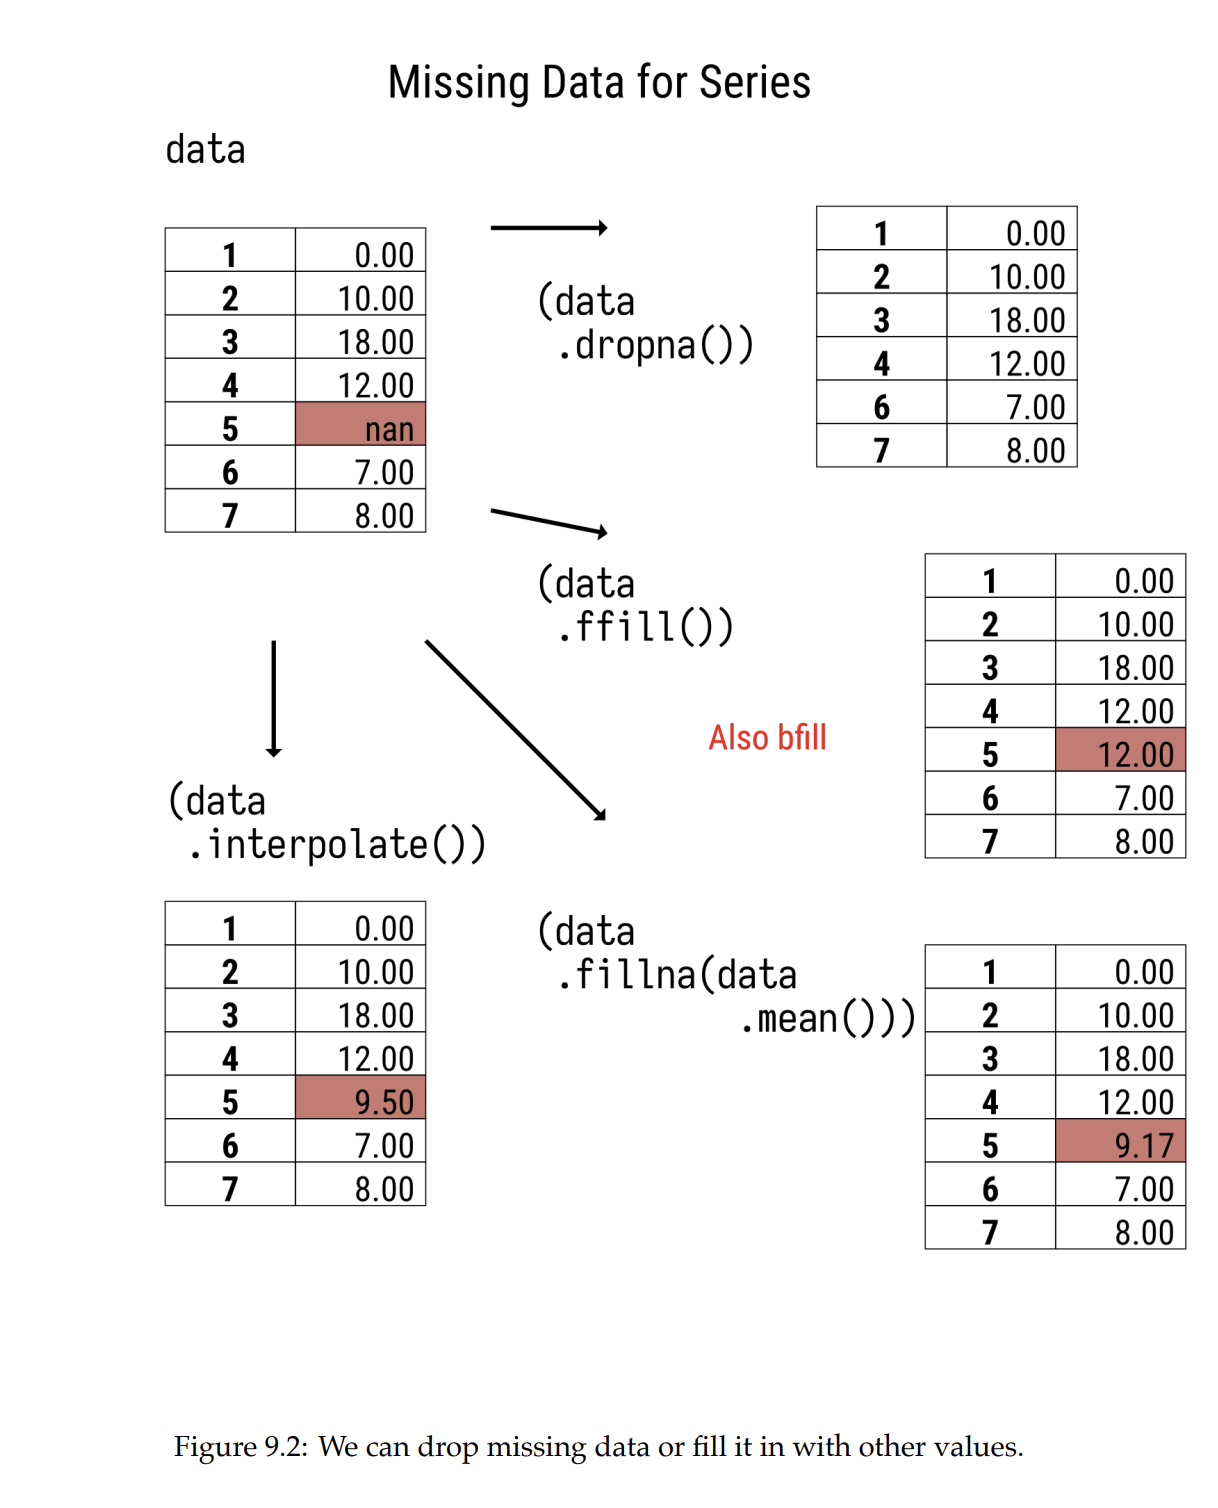

## 6. Asignar Valores

También podemos modificar los valores de nuestra tabla de datos, o agregarle nuevos valores. Para ello usamos el símbolo "=". Del lado izquierdo del símbolo elegimos los valores que queremos asignar. Del lado derecho ponemos sus nuevos valores.

Supongamos que queremos tener una nueva columna con los pesos (Kg) en otra unidad (T):

In [ ]:
df_viajes["PESO_NETO_T"] = df_viajes["PESO_NETO"]/1000
df_viajes

,DIA,TIPO_SERVICIO,TRAYECTO,PESO_NETO,CANT_VIAJES,PESO_NETO_T
0,01/01/2022,24,1904,14230,1,14.23
1,01/01/2022,24,1906,16020,1,16.02
2,01/01/2022,24,1910,14010,1,14.01
3,01/01/2022,24,1912,0,1,0.00
4,01/01/2022,24,2786,26640,1,26.64
...,...,...,...,...,...,...
11238,31/05/2022,72,2620,0,1,0.00
11239,31/05/2022,73,2622,2270,1,2.27
11240,31/05/2022,75,2492,0,1,0.00
11241,31/05/2022,75,2512,0,1,0.00


También podría querer construir una columna a partir de una condición, recordemos que la condición de más arriba `condicion_peso_mayor` seleccionaba aquellas filas con peso mayor a 9000:

In [ ]:
df_viajes["ES_PESADO"] = condicion_peso_mayor
df_viajes

,DIA,TIPO_SERVICIO,TRAYECTO,PESO_NETO,CANT_VIAJES,PESO_NETO_T,ES_PESADO
0,01/01/2022,24,1904,14230,1,14.23,True
1,01/01/2022,24,1906,16020,1,16.02,True
2,01/01/2022,24,1910,14010,1,14.01,True
3,01/01/2022,24,1912,0,1,0.00,False
4,01/01/2022,24,2786,26640,1,26.64,True
...,...,...,...,...,...,...,...
11238,31/05/2022,72,2620,0,1,0.00,False
11239,31/05/2022,73,2622,2270,1,2.27,False
11240,31/05/2022,75,2492,0,1,0.00,False
11241,31/05/2022,75,2512,0,1,0.00,False


Si queremos eliminar una columna de nuestro DataFrame, podemos usar la función ".drop()", indicando el nombre de la columna a eliminar. Por ejemplo, borramos las últimas columnas que creamos (el parámetro axis=1 indica que queremos borrar una columna, y el inplace=True indica que queremos que el cambio quede guardado en el mismo DataFrame):

In [ ]:
df_viajes.drop(['PESO_NETO_T', 'ES_PESADO'], axis=1, inplace=True)
df_viajes

,DIA,TIPO_SERVICIO,TRAYECTO,PESO_NETO,CANT_VIAJES
0,01/01/2022,24,1904,14230,1
1,01/01/2022,24,1906,16020,1
2,01/01/2022,24,1910,14010,1
3,01/01/2022,24,1912,0,1
4,01/01/2022,24,2786,26640,1
...,...,...,...,...,...
11238,31/05/2022,72,2620,0,1
11239,31/05/2022,73,2622,2270,1
11240,31/05/2022,75,2492,0,1
11241,31/05/2022,75,2512,0,1


## 7. Agrupar datos

Otra funcionalidad útil es la de agrupar datos según algún criterio, para poder procesar los datos de forma separada según los grupos. Para esto usamos la función ".groupby()".

Por ejemplo, si queremos calcular cual es el el total de toneladas por cada dia de nuestro DataFrame, primero agrupamos el dataframe por fecha (columna *DIA*), y luego calculamos la suma:

In [ ]:
viajes_grupo = df_viajes[['DIA', 'PESO_NETO']].groupby('DIA')
viajes_grupo.sum()

,PESO_NETO
DIA,
01/01/2022,176730
01/02/2022,676380
01/03/2022,966540
01/04/2022,794220
01/05/2022,326860
...,...
30/04/2022,463830
30/05/2022,916380
31/01/2022,849660


## 8. Reorganizar los datos

Otra acción que frecuentemente queremos hacer sobre los datos es cambiar su organización. Diferentes análisis sobre los datos pueden verse facilitados por diferentes organizaciones de los datos, o incluso requerir una organización específica.

Por ejemplo en el DataFrame de viajes cada uno corresponde a un trayecto, y en DataFrame trayectos tenemos información extra de cada uno. Podemos usar la función *merge* para construir un nuevo DataFrame a partir de los dos.

La función merge se hace sobre un DataFrame y se le pasa como argumento otro DataFrame, la estrategia de vinculo de datos que se quiere usar y la columna que se quiere vincular. En este caso usamos la columna "TRAYECTO" presente en ambos DataFrames y la estrategia "left" porque queremos que el DataFrame resultante tenga la misma cantidad de filas que el original, pero que cuando sea posible se agregue información extra en forma de columnas.

In [ ]:
df_viajes_trayectos = df_viajes.merge(df_trayectos, on=['TRAYECTO'], how='left')
df_viajes_trayectos

,DIA,TIPO_SERVICIO,TRAYECTO,PESO_NETO,CANT_VIAJES,DESCRIPCION,NOMENCLATURA_CIRCUITO
0,01/01/2022,24,1904,14230,1,RECOLECCION DOMICILIARIA POR CONTENEDORES MET...,CH_DU_RM_CL_01
1,01/01/2022,24,1906,16020,1,RECOLECCION DOMICILIARIA POR CONTENEDORES MET...,CH_DU_RM_CL_03
2,01/01/2022,24,1910,14010,1,RECOLECCION DOMICILIARIA POR CONTENEDORES MET...,CH_DU_RM_CL_07
3,01/01/2022,24,1912,0,1,RECOLECCION DOMICILIARIA POR CONTENEDORES MET...,CH_DU_RM_CL_09
4,01/01/2022,24,2786,26640,1,RECOLECCIÓN DOMICILIARIA POR CONTENEDORES METÁ...,C_DU_RM_CL_104
...,...,...,...,...,...,...,...
11238,31/05/2022,72,2620,0,1,SERVICIO DE PLUMA DE CONTENEDORES,URMO_PLU_01_N
11239,31/05/2022,73,2622,2270,1,SERVICIO DE GRÚA DE CONTENEDORES,URMO_GRU_01_M
11240,31/05/2022,75,2492,0,1,LEY DE ENVASES,ABC_DU_RS_ST_01
11241,31/05/2022,75,2512,0,1,LEY DE ENVASES + MI BARRIO CLASIFICA,EF_DU_RS_ST_02


El resultado es un nuevo DataFrame con la información de ambos juegos de datos.


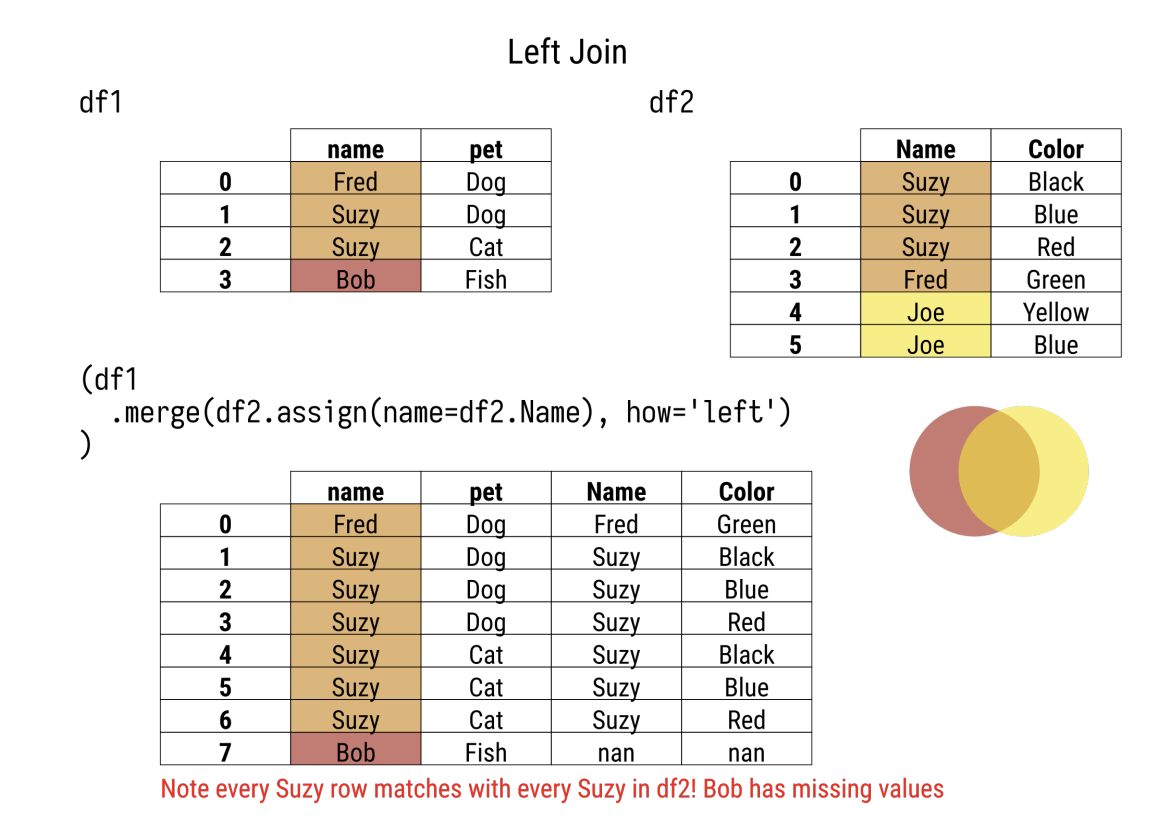

Otro ejemplo: en el DataFrame *df_viajes_trayectos*, para cada día tenemos varias filas, cada una indicando un tipo de servicio (*TIPO_SERVICIO*) distinto, y el *PESO_NETO* asociado al mismo. Una organización alternativa que podemos querer usar es una única fila para cada tipo de servicio, y una columna diferente para cada día, conteniendo en cada celda el peso correspondiente. Abajo mostramos cómo hacemos esta reorganización:

In [ ]:
df_peso_tipo_dia = pd.pivot_table(df_viajes_trayectos, values='CANT_VIAJES', index=['TIPO_SERVICIO'], columns=['DIA'])
df_peso_tipo_dia.head()

DIA,01/01/2022,01/02/2022,01/03/2022,01/04/2022,01/05/2022,02/01/2022,02/02/2022,02/03/2022,02/04/2022,02/05/2022,...,29/03/2022,29/04/2022,29/05/2022,30/01/2022,30/03/2022,30/04/2022,30/05/2022,31/01/2022,31/03/2022,31/05/2022
TIPO_SERVICIO,,,,,,,,,,,,,,,,,,,,,
1,NaN,1.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.00,1.000000,1.000000
2,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,1.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,1.000000,NaN
4,NaN,1.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.00,1.000000,NaN
8,NaN,1.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN,...,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,1.00,1.000000,1.000000
24,1.0,1.183673,1.078431,1.230769,1.0,1.186047,1.255319,1.150943,1.081081,1.145455,...,1.127273,1.123077,1.030303,1.054054,1.107143,1.294118,1.159091,1.22,1.113208,1.083333


En esta nueva organización se ve claramente (Nan) que no todos los días hubo viajes para cada tipo de servicio. Usamos *fillna* para reflejarlo mejor.

In [ ]:
df_peso_tipo_dia.fillna(0).head()

DIA,01/01/2022,01/02/2022,01/03/2022,01/04/2022,01/05/2022,02/01/2022,02/02/2022,02/03/2022,02/04/2022,02/05/2022,...,29/03/2022,29/04/2022,29/05/2022,30/01/2022,30/03/2022,30/04/2022,30/05/2022,31/01/2022,31/03/2022,31/05/2022
TIPO_SERVICIO,,,,,,,,,,,,,,,,,,,,,
1,0.0,1.000000,1.000000,1.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000
2,0.0,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.00,1.000000,0.000000
4,0.0,1.000000,1.000000,1.000000,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00,1.000000,0.000000
8,0.0,1.000000,1.000000,1.000000,0.0,0.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.000000
24,1.0,1.183673,1.078431,1.230769,1.0,1.186047,1.255319,1.150943,1.081081,1.145455,...,1.127273,1.123077,1.030303,1.054054,1.107143,1.294118,1.159091,1.22,1.113208,1.083333


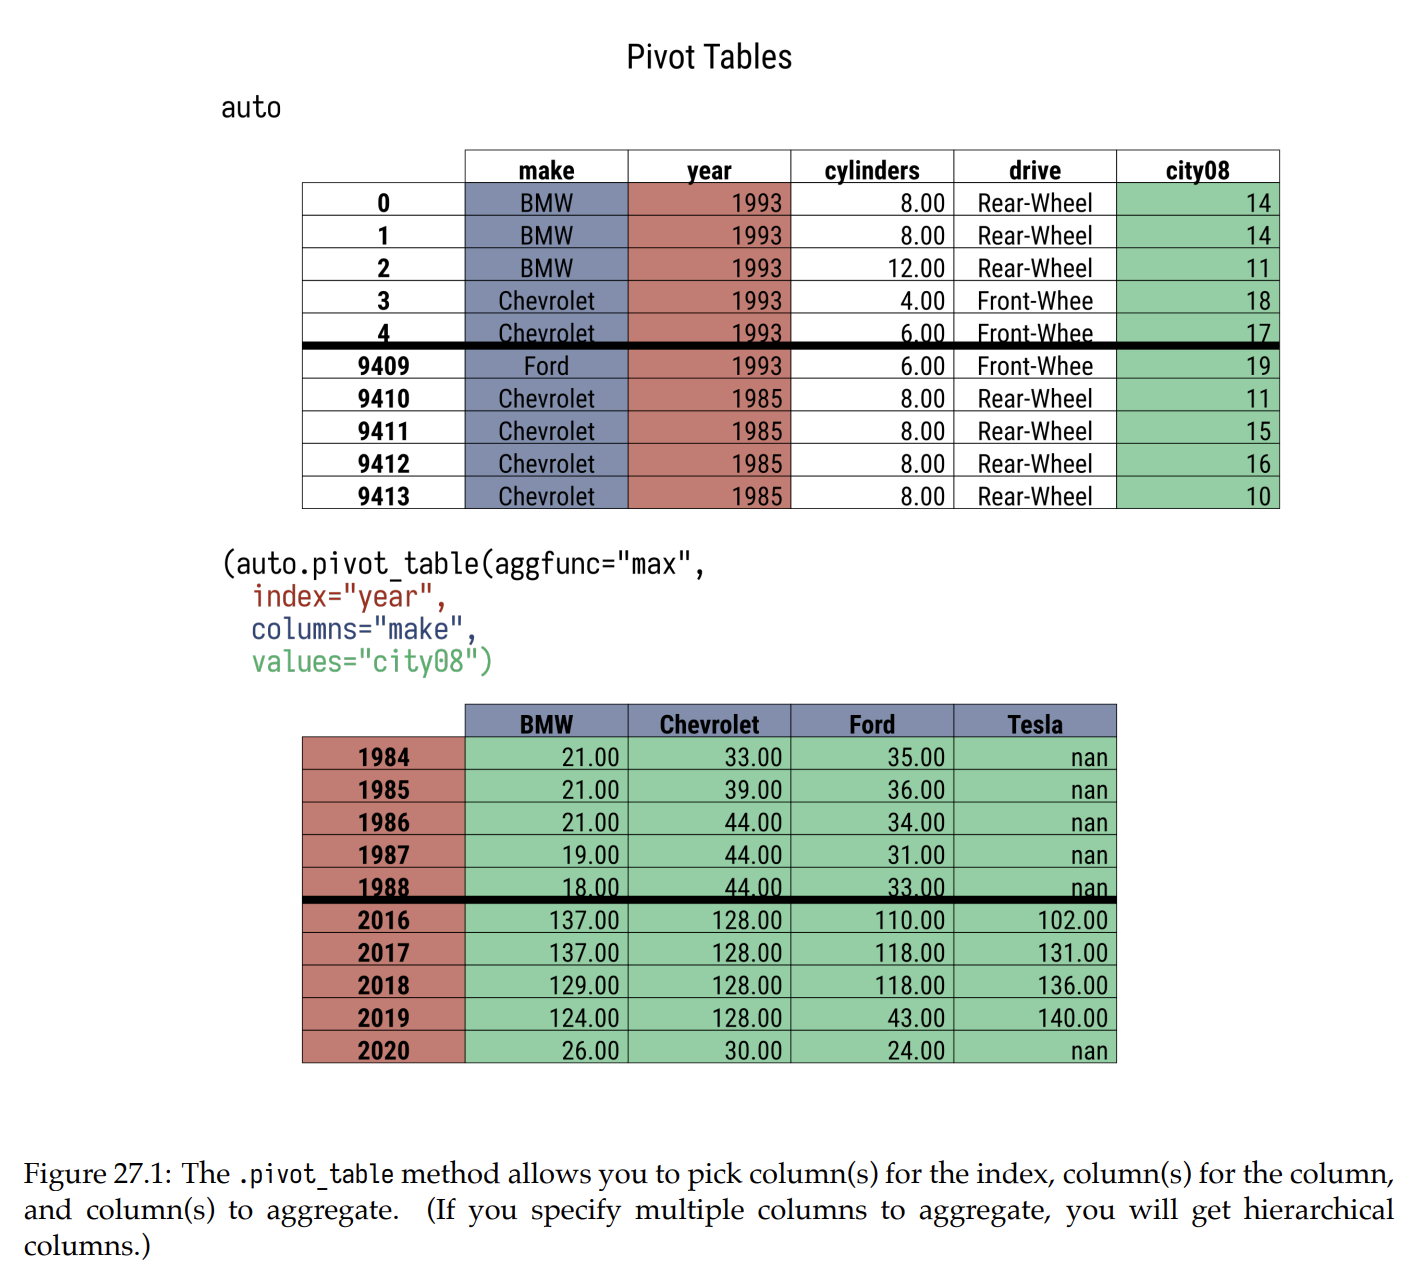

## 9. Otras funciones

Es posible ordenar los resultados de una consulta (que es siempre un DataFrame):

In [ ]:
df_viajes_trayectos.sort_values(['DIA', 'PESO_NETO'])

,DIA,TIPO_SERVICIO,TRAYECTO,PESO_NETO,CANT_VIAJES,DESCRIPCION,NOMENCLATURA_CIRCUITO
3,01/01/2022,24,1912,0,1,RECOLECCION DOMICILIARIA POR CONTENEDORES MET...,CH_DU_RM_CL_09
8,01/01/2022,24,2790,10950,1,RECOLECCIÓN DOMICILIARIA POR CONTENEDORES METÁ...,C_DU_RM_CL_108
2,01/01/2022,24,1910,14010,1,RECOLECCION DOMICILIARIA POR CONTENEDORES MET...,CH_DU_RM_CL_07
0,01/01/2022,24,1904,14230,1,RECOLECCION DOMICILIARIA POR CONTENEDORES MET...,CH_DU_RM_CL_01
1,01/01/2022,24,1906,16020,1,RECOLECCION DOMICILIARIA POR CONTENEDORES MET...,CH_DU_RM_CL_03
...,...,...,...,...,...,...,...
11224,31/05/2022,24,2810,26260,1,RECOLECCIÓN DOMICILIARIA POR CONTENEDORES METÁ...,F_DU_RM_CL_110
11193,31/05/2022,24,2689,27960,2,RECOLECCION DOMICILIARIA POR CONTENEDORES META...,E_DU_RM_CL_113
11223,31/05/2022,24,2809,32080,1,RECOLECCIÓN DOMICILIARIA POR CONTENEDORES METÁ...,F_DU_RM_CL_109
11212,31/05/2022,24,2783,32640,1,RECOLECCIÓN DOMICILIARIA POR CONTENEDORES METÁ...,C_DU_RM_CL_101


Si queremos obtener la medida de algunas las columnas, usamos `agg` para indicarle que aplique el método `np.mean` a las columnas seleccionadas (el método permite más de una función, así que calcularemos también la desviación estándar). En nuestro ejemplo, estamos agrupando según el valor de una sola columna, pero puede agruparse por más de una.

In [ ]:
df_viajes_trayectos.groupby('DIA')[['PESO_NETO', 'CANT_VIAJES']].agg([np.mean, np.std])

PESO_NETO               CANT_VIAJES          
                    mean           std        mean       std
DIA                                                         
01/01/2022  16066.363636   6821.155727    1.000000  0.000000
01/02/2022   8350.370370   9641.910268    1.111111  0.316228
01/03/2022  10392.903226  10090.011158    1.053763  0.226773
01/04/2022   9025.227273   8737.190555    1.136364  0.507004
01/05/2022  11271.034483   8979.467589    1.000000  0.000000
...                  ...           ...         ...       ...
30/04/2022   7730.500000   6765.361535    1.166667  0.418499
30/05/2022  11599.746835  10750.737121    1.088608  0.285992
31/01/2022  11800.833333  11935.866266    1.152778  0.493899
31/03/2022   8655.454545   6911.952318    1.068182  0.295384
31/05/2022   9614.852941   9675.771325    1.058824  0.237044

[151 rows x 4 columns]

# Recapitulando

1. Como se relaciona esto con las BD?
2. Qué tan poderoso puede ser un notebook con python?
3. Que tan lejos está esto de ser un programa "real"?
4. Qué viene después?

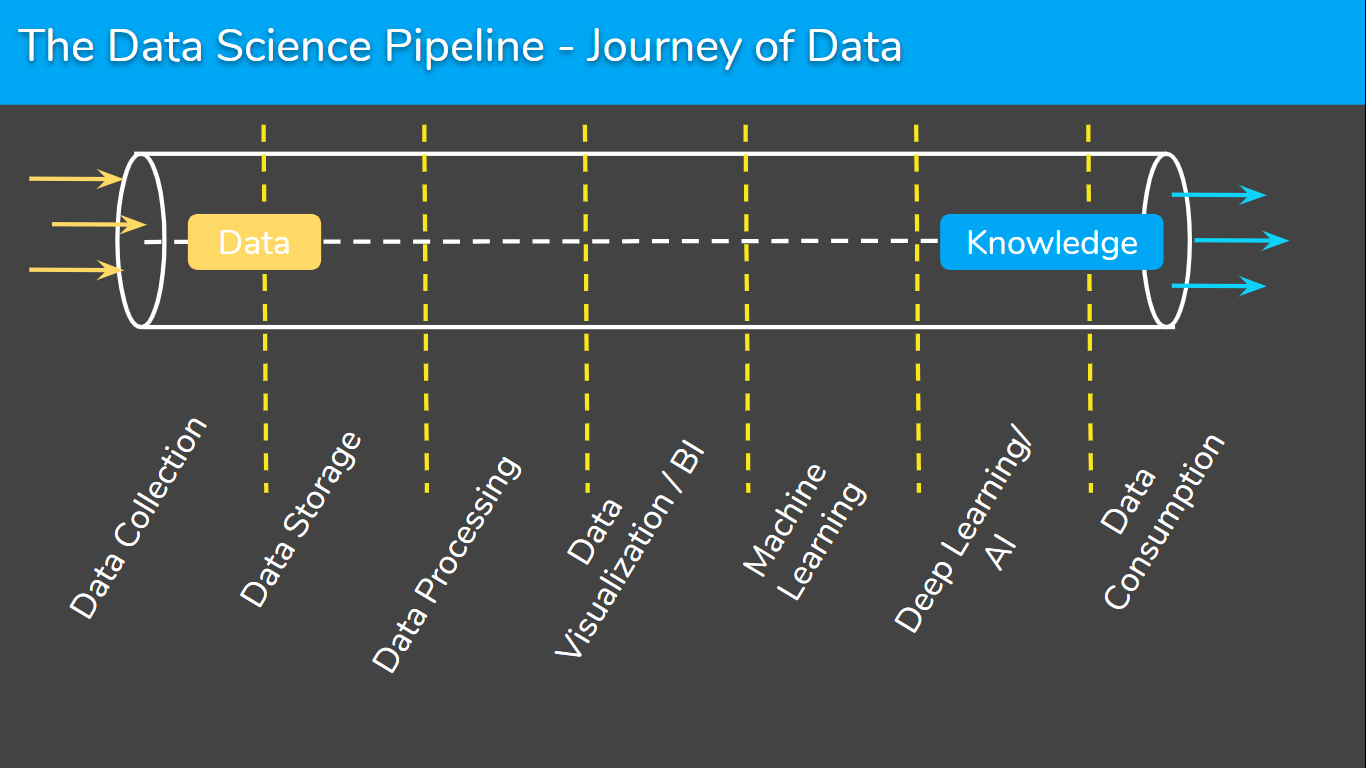

## 10. Extras

### Codigos Postales

En el catalogo de datos están las zonas de los CPs... pero nada más

In [ ]:
%%capture
!pip install geopandas
!wget -O codigos.zip https://catalogodatos.gub.uy/dataset/7eb3681f-3e58-475d-9cd4-4527dc6ab234/resource/4682cccd-37da-4664-9b7c-69fc8f322784/download/codigospostales.zip
!unzip codigos.zip

In [ ]:
import geopandas as gpd

df = gpd.read_file('codigos_postales.shp')
df.head()

,cod_postal,geometry
0,50200,"POLYGON ((-57.53197 -30.72899, -57.56593 -30.8..."
1,91300,"POLYGON ((-56.04162 -34.47962, -56.08974 -34.4..."
2,91400,"POLYGON ((-55.93161 -34.48680, -55.96239 -34.5..."
3,75400,"POLYGON ((-57.49064 -33.66526, -57.48283 -33.6..."
4,36100,"POLYGON ((-54.82793 -32.65684, -54.68936 -32.7..."


In [ ]:
df = df.set_geometry('geometry')

In [ ]:
df['cod_postal'].value_counts()

50200    1
91700    1
96100    1
95400    1
95600    1
        ..
34100    1
60300    1
20200    1
15000    1
80100    1
Name: cod_postal, Length: 123, dtype: int64

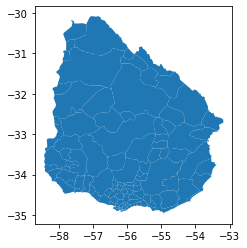

In [ ]:
df.plot()

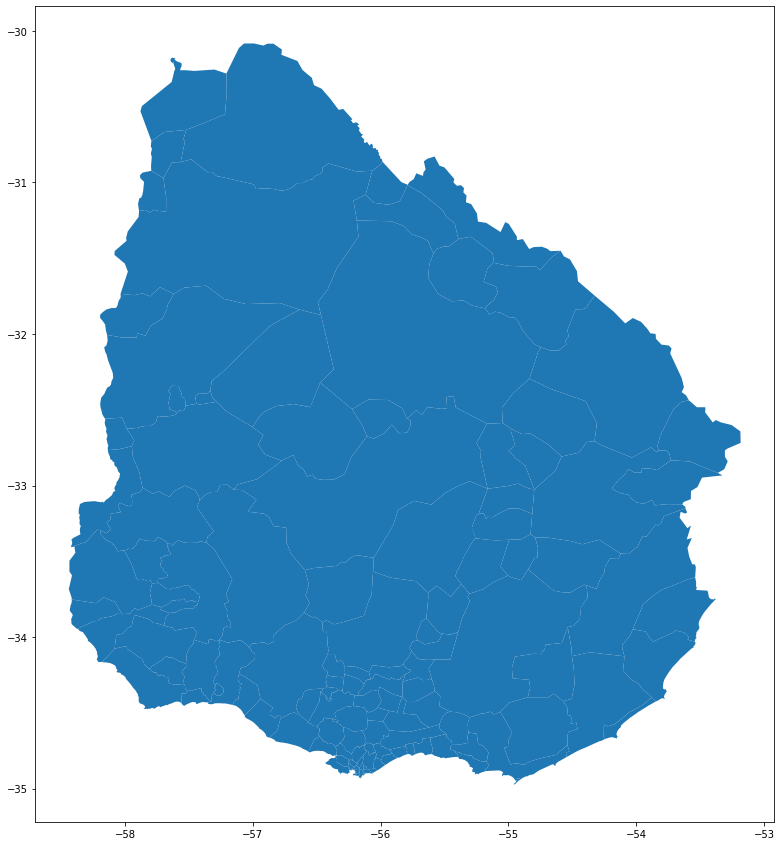

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
df.plot(ax=ax)

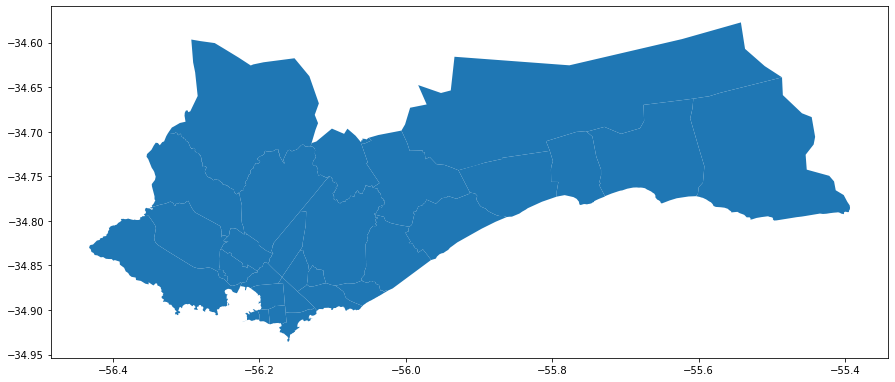

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

df[df['cod_postal'] < 20000].plot(ax=ax)

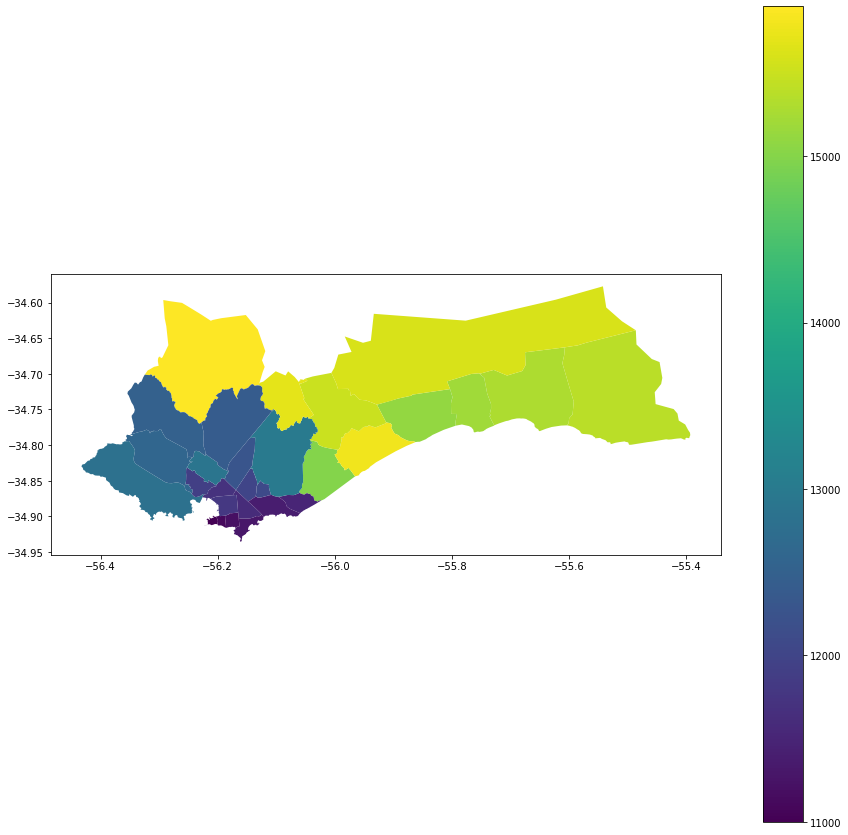

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

df[df['cod_postal'] < 20000].plot(ax=ax, column='cod_postal', legend=True, cmap='viridis')

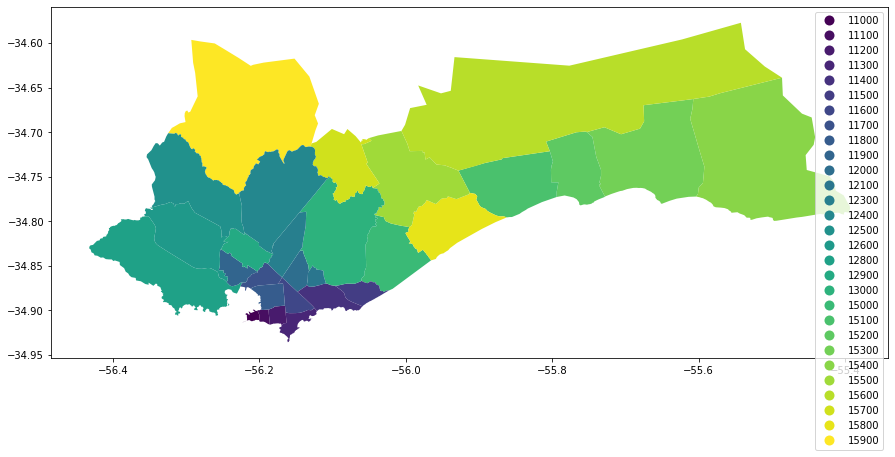

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

df[df['cod_postal'] < 20000].plot(ax=ax, column='cod_postal', legend=True, cmap='viridis', categorical=True)

Googleando un poco damos con este archivo excel....

In [ ]:
%%capture
!gdown --id 11xHTgrSWr-arZ_ha3hqBpWj_fPNGWU69

In [ ]:
df_loc = pd.read_csv('Localidades.csv', sep=';')
df_loc

,DEPARTAMENTO,LOCALIDAD,CODIGO POSTAL,Unnamed: 3,Unnamed: 4
0,ARTIGAS,BALTASAR BRUM,55000,NaN,NaN
1,ARTIGAS,BELLA UNION,55100,NaN,NaN
2,ARTIGAS,BERNABE RIVERA,55000,NaN,NaN
3,ARTIGAS,CAINSA,55100,NaN,NaN
4,ARTIGAS,CAINZA CAMPO 3,55100,NaN,NaN
...,...,...,...,...,...
2056,TREINTA Y TRES,VERGARA,31100,NaN,NaN
2057,TREINTA Y TRES,VILLA PASSANO,33000,NaN,NaN
2058,TREINTA Y TRES,VILLA SARA,33000,NaN,NaN
2059,TREINTA Y TRES,YERBAL CHICO,33000,NaN,NaN


In [ ]:
df_loc[['DEPARTAMENTO','CODIGO POSTAL']].drop_duplicates(subset='CODIGO POSTAL')

,DEPARTAMENTO,CODIGO POSTAL
0,ARTIGAS,55000
1,ARTIGAS,55100
50,ARTIGAS,50200
57,CANELONES,15000
58,CANELONES,90200
...,...,...
1787,SORIANO,75500
1792,SORIANO,75400
1855,TACUAREMBO,45200
1971,TREINTA Y TRES,33000


Que tambien está disponible como API


https://www.correo.com.uy/servicios-web

In [ ]:
import requests

answer = requests.post("http://geo.correo.com.uy/serviciosv2/localidades.ctr?departamento=Montevideo")

answer.json()


[{'codigoPostal': 12492, 'id': 3208, 'nombre': 'ABAYUBA'},
 {'codigoPostal': 15092,
  'id': 698,
  'nombre': 'AEROPUERTO INTERNACIONAL DE CARRASCO'},
 {'codigoPostal': 15092, 'id': 8, 'nombre': 'BARRA DE CARRASCO'},
 {'codigoPostal': 15592, 'id': 28, 'nombre': 'BARROS BLANCOS'},
 {'codigoPostal': 15892, 'id': 14, 'nombre': 'CIUDAD DE LA COSTA'},
 {'codigoPostal': 15067, 'id': 401, 'nombre': 'COLONIA NICOLICH'},
 {'codigoPostal': 15592, 'id': 3226, 'nombre': 'FRACC. CAMINO MALDONADO'},
 {'codigoPostal': 15792, 'id': 451, 'nombre': 'FRACC. CNO. ANDALUZ Y R.84'},
 {'codigoPostal': 15592, 'id': 409, 'nombre': 'JOAQUIN SUAREZ'},
 {'codigoPostal': 15992, 'id': 392, 'nombre': 'LA PAZ'},
 {'codigoPostal': 15992, 'id': 143, 'nombre': 'LAS PIEDRAS'},
 {'codigoPostal': 12508, 'id': 3171, 'nombre': 'MELILLA'},
 {'codigoPostal': 10092, 'id': 3180, 'nombre': 'MONTEVIDEO'},
 {'codigoPostal': 12813, 'id': 3207, 'nombre': 'PAJAS BLANCAS'},
 {'codigoPostal': 15092, 'id': 931, 'nombre': 'PARQUE MIRAMAR'}

**Ejercicio:**

1) Graficar pero mostrar el nombre de la Localidad o Departamento en la leyenda.